<a href="https://colab.research.google.com/github/Ivanc110694/Grafos/blob/main/Recorrido%20DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import graphviz as gv

In [64]:
#Leer Archivo
def rl(ar,et=False,w=False,s="|"):
  with open(ar) as f:
    la = None
    if et:
      la = f.readline().strip().split()
    L = []
    for l in f:
      if w:
        L.append([tuple(map(int,s.split()))for s in l.strip().split()])
      else:
        L.append(list(map(int,l.strip().split())))
  return L,la

In [65]:
#Mostrar Grafo -> representación lista de adyacencia
def Sl(L,l = None,d=False,w=False,p=[], Ge = {'layout': 'sfdp'},
       no = {'color': 'orangered'},ed={'color':'blue'}):
  if d:
    g = gv.Digraph("G")
  else:
    g = gv.Graph("G")
  g.attr(**Ge)
  n = len(L)
  for u in range(n):
    g.node(str(u),l[u] if l else str(u),**no)
  n_r = []
  for v,u in enumerate(p):
    if u!=None:
      if w:
        for vi,w in L[u]:
          if vi == v:
            break
        g.edge(str(u),str(v),str(w),dir="forward",pendwith="2",color="green")
      else:
        g.edge(str(u),str(v),dir="forward",pendwith="2",color="green")
      n_r.append(f"{u},{v}");n_r.append(f"{v},{u}")
  if w:
    for u in range(n):
      for v,w in L[u]:
        if not d and not f"{u},{v}" in n_r:
          n_r.append(f"{u},{v}");n_r.append(f"{v},{v}")
          g.edge(str(u),str(v),str(w),**ed)
        elif d and not f"{u},{v}" in n_r:
          n_r.append(f"{u},{v}");n_r.append(f"{v},{u}")
          g.edge(str(u),str(v),str(w),**ed)
  else:
    for u in range(n):
      for v in L[u]:
        if not d and not f"{u},{v}" in n_r:
          n_r.append(f"{u},{v}");n_r.append(f"{v},{u}")
          g.edge(str(u),str(v),**ed)
        elif d and not f"{u},{v}" in n_r:
          n_r.append(f"{u},{v}");n_r.append(f"{v},{u}")
          g.edge(str(u),str(v),**ed)
  return g

In [66]:
%%file 1.AdjL
3 4
3 5
5 6
0 1 7
0 6 7
1 2
2 4 7
3 4 6

Overwriting 1.AdjL


In [67]:
L,_=rl("1.AdjL")
for n,a in enumerate(L):
  print(f"{n}: {a}")

0: [3, 4]
1: [3, 5]
2: [5, 6]
3: [0, 1, 7]
4: [0, 6, 7]
5: [1, 2]
6: [2, 4, 7]
7: [3, 4, 6]


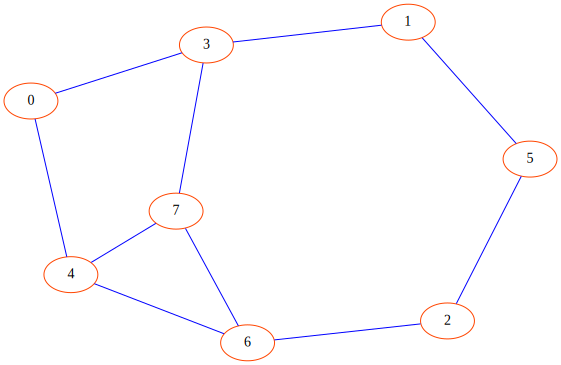

In [68]:
Sl(L)

In [69]:
def DFS(G,S):
  n = len(G)
  visited = [0]*n
  parent = [None]*n

  def _DFS(u:int):
    visited[u] = 1
    for v in G[u]:
      if visited[v] == 0:
        parent[v] = u
        _DFS(v)
  _DFS(S)
  return parent

[None, 3, 5, 0, 6, 1, 2, 4]


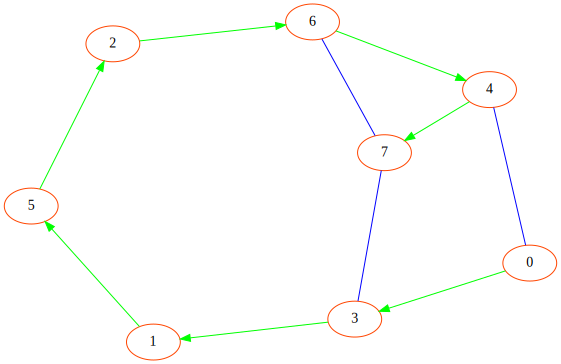

In [71]:
path= DFS(L,0)
print(path)
Sl(L,p=path)